In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [2]:
train=pd.read_csv('train_data.csv',na_values=['?','Unknown/Invalid','nan'])

# Analysis on Train set

In [3]:
train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [4]:
test=pd.read_csv("test_data.csv",na_values=['?','Unknown/Invalid','nan'])

In [5]:
test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [6]:
test.nunique()

id                       15500
date                        31
product_identifier          50
department_identifier        6
category_of_product          3
outlet                      10
state                        3
dtype: int64

In [7]:
date_to_week_id_map=pd.read_csv('date_to_week_id_map.csv')
date_to_week_id_map.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [8]:
product_prices=pd.read_csv('product_prices.csv')
product_prices.head()

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [9]:
train.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
dtype: int64

In [10]:
product_prices.isnull().sum()

outlet                0
product_identifier    0
week_id               0
sell_price            0
dtype: int64

In [11]:
train.shape

(395000, 7)

In [12]:
test.shape

(15500, 7)

In [13]:
train.nunique()

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
dtype: int64

In [14]:
product_prices.shape

(59000, 4)

In [15]:
product_prices.nunique()

outlet                 10
product_identifier     50
week_id               118
sell_price            112
dtype: int64

In [16]:
train.describe()

,product_identifier,department_identifier,outlet,sales
count,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919
std,809.799518,6.337863,91.161291,3.595266
min,74.000000,11.000000,111.000000,0.000000
25%,926.000000,21.000000,113.000000,0.000000
50%,1325.000000,22.000000,221.500000,0.000000
75%,1753.000000,31.000000,331.000000,1.000000
max,3021.000000,33.000000,333.000000,293.000000


In [17]:
#sns.pairplot(train,hue='sales')

In [18]:
df=pd.merge(train,date_to_week_id_map, on=['date'], how='inner')
df

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id
0,2012-01-01,74,11,others,111,Maharashtra,0,49
1,2012-01-01,337,11,others,111,Maharashtra,1,49
2,2012-01-01,423,12,others,111,Maharashtra,0,49
3,2012-01-01,432,12,others,111,Maharashtra,0,49
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49
...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161


In [19]:
final_train=pd.merge(df,product_prices,on=['outlet','product_identifier','week_id'], how='inner')
final_train

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-02,74,11,others,111,Maharashtra,0,49,2.94
2,2012-01-03,74,11,others,111,Maharashtra,1,49,2.94
3,2012-01-04,74,11,others,111,Maharashtra,0,49,2.94
4,2012-01-05,74,11,others,111,Maharashtra,0,49,2.94
...,...,...,...,...,...,...,...,...,...
394995,2014-02-24,3021,33,drinks_and_food,333,Kerala,0,161,2.08
394996,2014-02-25,3021,33,drinks_and_food,333,Kerala,0,161,2.08
394997,2014-02-26,3021,33,drinks_and_food,333,Kerala,0,161,2.08
394998,2014-02-27,3021,33,drinks_and_food,333,Kerala,0,161,2.08


In [20]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [21]:
final_train.nunique()

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
week_id                  113
sell_price               107
dtype: int64

In [22]:
final_train.dtypes

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [23]:
final_train['Month'] = pd.to_datetime(final_train['date']).dt.month
final_train

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,Month
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94,1
1,2012-01-02,74,11,others,111,Maharashtra,0,49,2.94,1
2,2012-01-03,74,11,others,111,Maharashtra,1,49,2.94,1
3,2012-01-04,74,11,others,111,Maharashtra,0,49,2.94,1
4,2012-01-05,74,11,others,111,Maharashtra,0,49,2.94,1
...,...,...,...,...,...,...,...,...,...,...
394995,2014-02-24,3021,33,drinks_and_food,333,Kerala,0,161,2.08,2
394996,2014-02-25,3021,33,drinks_and_food,333,Kerala,0,161,2.08,2
394997,2014-02-26,3021,33,drinks_and_food,333,Kerala,0,161,2.08,2
394998,2014-02-27,3021,33,drinks_and_food,333,Kerala,0,161,2.08,2


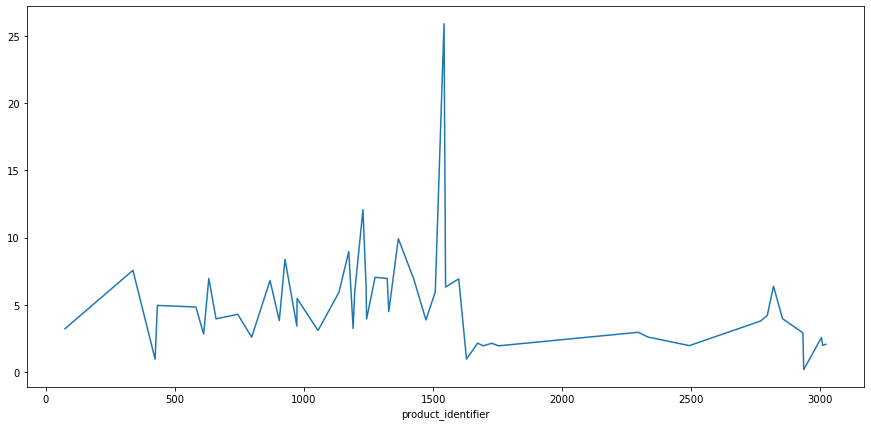

In [24]:
fig, ax = plt.subplots(figsize=(15, 7));
final_train.groupby('product_identifier')['sell_price'].agg('mean').plot(kind='line');

Observations:

Most of the product prices are under 10.Product_identifier: around 1540, is the product with the highest price, which is over 25. Second comes product_identifier:around 1200 which is 12.

<AxesSubplot:>

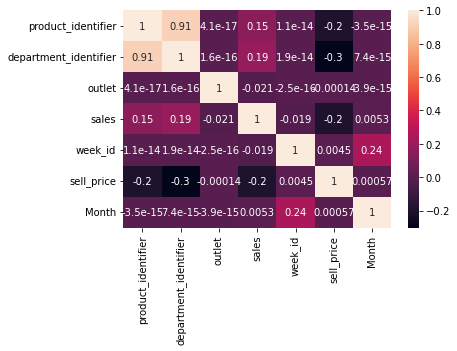

In [25]:
sns.heatmap(final_train.corr(),annot=True)

<AxesSubplot:xlabel='Month'>

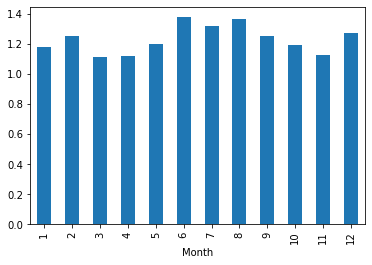

In [26]:
(final_train.groupby('Month')['sales'].agg('mean')).plot(kind= 'bar')

Observation:

From the above barplot we can infer that in june and august month the sales are high    
    

In [27]:
y=final_train['sales']
X=final_train.drop(['sales'],axis=1)

In [28]:
final_train.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price', 'Month'],
      dtype='object')

In [29]:
final_train.drop(['date','department_identifier','week_id'],axis=1,inplace=True)

In [30]:
cat_cols = X[['product_identifier','category_of_product','outlet','state',
       'sell_price','Month']].columns

<AxesSubplot:>

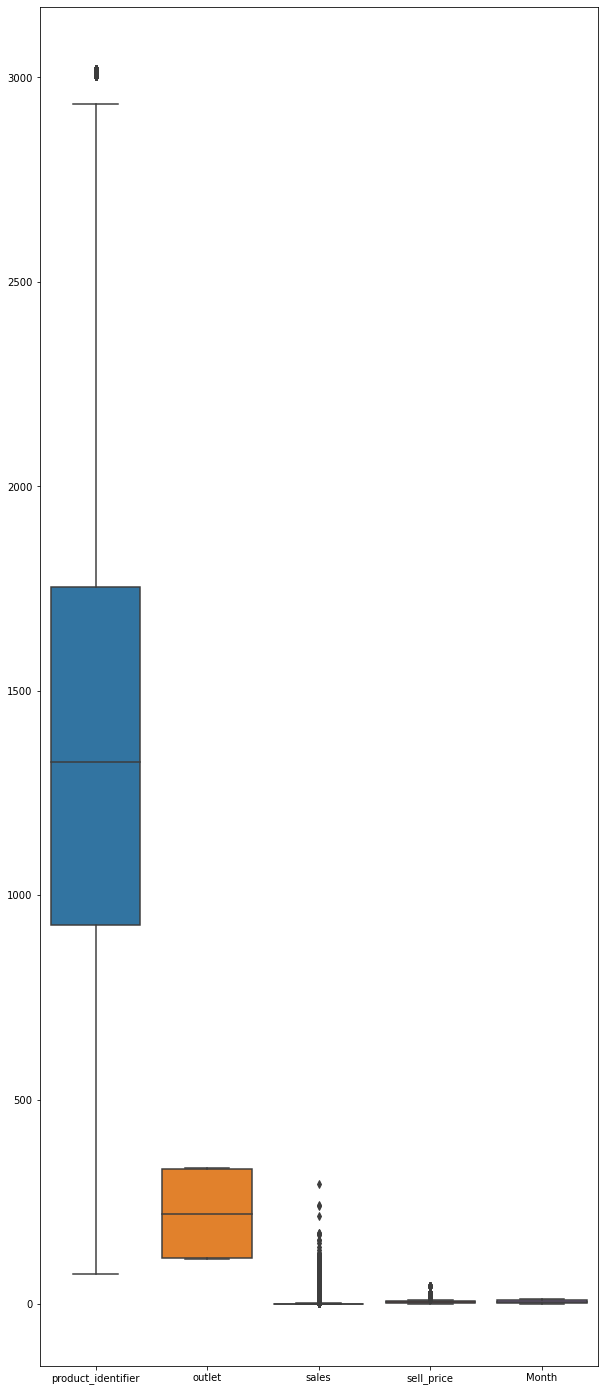

In [31]:
plt.figure(figsize=(10,25))
sns.boxplot(data=final_train)

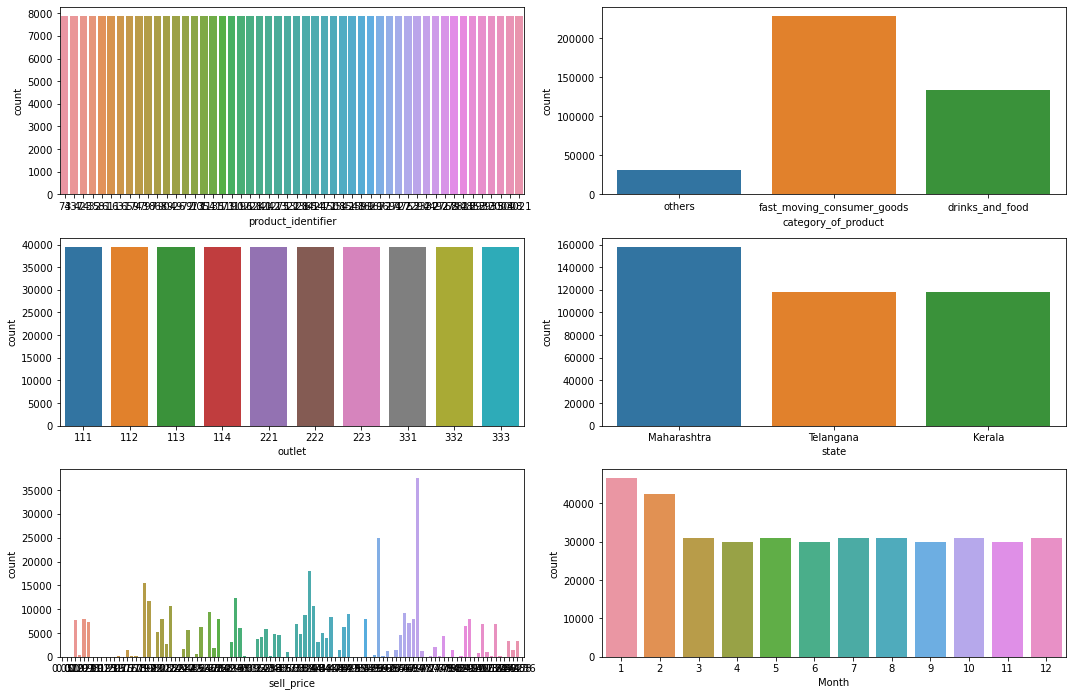

In [32]:
plt.figure(figsize=(15,80))

for i in range(0, len(cat_cols)):
    plt.subplot(25,2,i+1)
    sns.countplot(x=final_train[cat_cols[i]])
    plt.xlabel(cat_cols[i])
    plt.xticks(rotation=0)
    plt.tight_layout()

In [33]:
X[cat_cols] = X[cat_cols].astype('category')

# Train test split of the whole train data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
categorical_transformer=Pipeline([('ohe',OneHotEncoder(handle_unknown='ignore'))])

In [36]:
preprocessor=(ColumnTransformer(transformers=[('cat',categorical_transformer,cat_cols)]))

In [37]:
RF_pipe = Pipeline([('pp',preprocessor),('DT',DecisionTreeRegressor())])

In [38]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['product_identifier', 'category_of_product', 'outlet', 'state',
       'sell_price', 'Month'],
      dtype='object'))])),
                ('DT', DecisionTreeRegressor())])

# Evaluating model performance

In [39]:
train_pred_RFPipe = RF_pipe.predict(X_train)
test_pred_RFPipe = RF_pipe.predict(X_test)

In [40]:
mean_squared_error(y_train, train_pred_RFPipe, squared=False)


2.763688374037627

In [41]:
mean_squared_error(y_test, test_pred_RFPipe, squared=False)

2.6643015553719196

In [42]:
RF_pipe1 = Pipeline([('pp',preprocessor),('LR',LinearRegression())])

In [43]:
RF_pipe1.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['product_identifier', 'category_of_product', 'outlet', 'state',
       'sell_price', 'Month'],
      dtype='object'))])),
                ('LR', LinearRegression())])

In [44]:
test_pred_RFPipe1 = RF_pipe1.predict(X_test)

In [45]:
rmse1 = mean_squared_error(y_test, test_pred_RFPipe1, squared=False)
rmse1

2.904361365630385

# Hyper Parameter tuning for decision tree

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid={'DT__max_depth': [5, 10, None]}

grid_search=GridSearchCV(RF_pipe,param_grid,cv=5)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['product_identifier', 'category_of_product', 'outlet', 'state',
       'sell_price', 'Month'],
      dtype='object'))])),
                                       ('DT', DecisionTreeRegressor())]),
             param_grid={'DT__max_depth': [5, 10, None]})

In [47]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['product_identifier', 'category_of_product', 'outlet', 'state',
       'sell_price', 'Month'],
      dtype='object'))])),
                                       ('DT', DecisionTreeRegressor())]),
             param_grid={'DT__max_depth': [5, 10, None]})

In [48]:
gs=grid_search.predict(X_test)
gs

array([ 0.06578947, 18.85714286,  0.87234043, ...,  3.48888889,
        1.83333333,  1.04878049])

In [49]:
mean_squared_error(y_test, gs, squared=False)

2.664297006183736

# Analysis and EDA on test data

In [50]:
df1=pd.merge(test,date_to_week_id_map, on=['date'], how='inner')

In [51]:
final_test=pd.merge(df1,product_prices,on=['outlet','product_identifier','week_id'], how='inner')

In [52]:
final_test['Month'] = pd.to_datetime(final_test['date']).dt.month

In [53]:
#final_test

In [54]:
final_test.drop(['date','department_identifier','week_id','id'],axis=1,inplace=True)

In [55]:
final_test

,product_identifier,category_of_product,outlet,state,sell_price,Month
0,74,others,111,Maharashtra,3.43,3
1,74,others,111,Maharashtra,3.43,3
2,74,others,111,Maharashtra,3.43,3
3,74,others,111,Maharashtra,3.43,3
4,74,others,111,Maharashtra,3.43,3
...,...,...,...,...,...,...
15495,3008,drinks_and_food,333,Kerala,1.98,3
15496,3008,drinks_and_food,333,Kerala,1.98,3
15497,3021,drinks_and_food,333,Kerala,2.08,3
15498,3021,drinks_and_food,333,Kerala,2.08,3


In [56]:
test_pred_RFPipe = RF_pipe.predict(final_test)

In [57]:
test_pred_RFPipe

array([0.45833333, 0.45833333, 0.45833333, ..., 0.26666667, 0.26666667,
       0.26666667])

In [58]:
id=pd.DataFrame(test['id'])

In [59]:
id

,id
0,1
1,2
2,3
3,4
4,5
...,...
15495,15496
15496,15497
15497,15498
15498,15499


In [60]:
id['sales']=pd.DataFrame(test_pred_RFPipe1)

In [61]:
id

,id,sales
0,1,-0.202060
1,2,10.426500
2,3,2.013159
3,4,2.512458
4,5,0.472437
...,...,...
15495,15496,1.406491
15496,15497,0.198872
15497,15498,0.324737
15498,15499,1.333316


In [62]:
id.to_csv('submission1.csv',index=False)

In [63]:
id

,id,sales
0,1,-0.202060
1,2,10.426500
2,3,2.013159
3,4,2.512458
4,5,0.472437
...,...,...
15495,15496,1.406491
15496,15497,0.198872
15497,15498,0.324737
15498,15499,1.333316


In [64]:
#linear regression
RF_pipe1.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['product_identifier', 'category_of_product', 'outlet', 'state',
       'sell_price', 'Month'],
      dtype='object'))])),
                ('LR', LinearRegression())])

In [65]:
test_pred_RFPipe1 = RF_pipe1.predict(final_test)

In [66]:
id2=pd.DataFrame(test['id'])

In [67]:
id2['sales']=pd.DataFrame(test_pred_RFPipe1)

In [68]:
id2.to_csv('submission2.csv',index=False)

In [69]:
id2

,id,sales
0,1,0.470582
1,2,0.470582
2,3,0.470582
3,4,0.470582
4,5,0.470582
...,...,...
15495,15496,1.256947
15496,15497,1.256947
15497,15498,0.047880
15498,15499,0.047880


In [70]:
RF_pipe2 = Pipeline([('pp',preprocessor),('RF',RandomForestRegressor(n_estimators=70))])

In [71]:
RF_pipe2.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['product_identifier', 'category_of_product', 'outlet', 'state',
       'sell_price', 'Month'],
      dtype='object'))])),
                ('RF', RandomForestRegressor(n_estimators=70))])

In [72]:
test_pred_RFPipe2 = RF_pipe2.predict(final_test)

In [73]:
id3=pd.DataFrame(test['id'])

In [74]:
id3['sales']=pd.DataFrame(test_pred_RFPipe2)

In [75]:
id3

,id,sales
0,1,0.472529
1,2,0.472529
2,3,0.472529
3,4,0.472529
4,5,0.472529
...,...,...
15495,15496,0.098769
15496,15497,0.098769
15497,15498,0.282627
15498,15499,0.282627


In [76]:
id3.to_csv('submission3.csv',index=False)